# CBOW Model with spaCy Preprocessing and gensim

In this example, we preprocess our small corpus using spaCy, then train a Continuous Bag of Words (CBOW) model using [Gensim's Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html).  
The corpus is:
    
    ["Amos was a good prophet", "Amon was a bad king.", "Ahab was a bad, bad king."]

spaCy handles tokenization (and optionally more advanced processing), while gensim trains the CBOW model (default with sg=0).

In [ ]:
!pip install gensim

In [2]:
import spacy
from gensim.models import Word2Vec

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")

# Define the corpus
corpus = [
    "Amos was a good prophet in the Old Testament.",
    "Amon was a bad king.",
    "Ahab was a bad, bad king."
]

In [ ]:
# Preprocess the text using spaCy: tokenize, lowercase, and remove punctuation and spaces
def spacy_preprocess(text):
    doc = nlp(text)
    # Keep tokens that are not punctuation or space
    tokens = [token.text.lower() for token in doc if not token.is_punct]
    return tokens

# Tokenize each sentence in the corpus
sentences = [spacy_preprocess(sentence) for sentence in corpus]
print("Tokenized sentences:")
for sent in sentences:
    print(sent)

## Train a CBOW Model using gensim

We now train gensim's Word2Vec on our preprocessed sentences.  
The parameters are:
- **vector_size:** Dimensionality of the final word embeddings.
- **window:** Maximum distance between the current and predicted word.
- **min_count:** Minimum frequency count for words.
- **sg:** Set to 0 to use CBOW.
- **epochs:** Number of training iterations.

In [ ]:
model = Word2Vec(sentences,
                 vector_size=2,
                 window=3,
                 min_count=1,
                 sg=0,
                 epochs=100)

# Display the learned embeddings for each word
print("\nLearned word embeddings:")
for word in model.wv.key_to_index:
    print(f"{word}: {model.wv[word]}")

## Testing the Model

We can use the model to check for words most similar to a given word.  
For example, let's see which words are most similar to "bad".

In [ ]:
print("\nMost similar words to 'king':")
model.wv.most_similar("prophet")

### Check Vectors and Word Similarities

In [ ]:
# Getting word vector
model.wv["amos"]

In [ ]:
# Get cosine similiarity scores
model.wv.similarity("prophet", "bad")

In [ ]:
# Get the word that is the least like the others
model.wv.doesnt_match(["prophet", "amos", "bad"])

### Display Different Vectors in a 2D Space

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA # Import the PCA class from sklearn.decomposition

# Using PCA to reduce dimensions and plot vectors for words
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.wv.vocab ]

    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x, y, word)

# Plot vector space
display_pca_scatterplot(model,
                        words=list(model.wv.key_to_index))

## Creating Word2Vec Embeddings from Scratch

In [10]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

### Import and Clean Data

In [ ]:
# Set the path to the file you'd like to load
file_path = "BooksDatasetClean.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "elvinrustam/books-dataset",
  file_path
)

print("First 5 records:", df.head())

In [ ]:
df_desc = df[df["Description"].notna()]
df_desc[:10000]

In [ ]:
# Tokenize each sentence in the corpus
sentences = [spacy_preprocess(sentence) for sentence in df_desc["Description"][:10000]]
print(sentences[:5])

### Train Word2Vec Model

In [14]:
w2v = Word2Vec(sentences,
               vector_size=100,  # Dimensionality of the word vectors
               window=5,         # Maximum distance between the current and predicted word within a sentence
               sg=0,             # Skip-Gram model (1 for Skip-Gram, 0 for CBOW)
               min_count=5)      # Ignores all words with a total frequency lower than this

### Check Vectors and Word Similarities

In [ ]:
# Getting word vector
w2v.wv["russian"]

In [ ]:
# Get cosine similiarity scores
w2v.wv.similarity("diet", "exercise")

In [24]:
# Get most similiar words to a given word
w2v.wv.most_similar("poems")

[('essays', 0.9361270666122437),
 ('articles', 0.9309595227241516),
 ('letters', 0.925140917301178),
 ('photographs', 0.9248518347740173),
 ('images', 0.9172149896621704),
 ('quotations', 0.9166010618209839),
 ('reproductions', 0.9115866422653198),
 ('profiles', 0.9090577363967896),
 ('paintings', 0.9043413400650024),
 ('outstanding', 0.8970717787742615)]

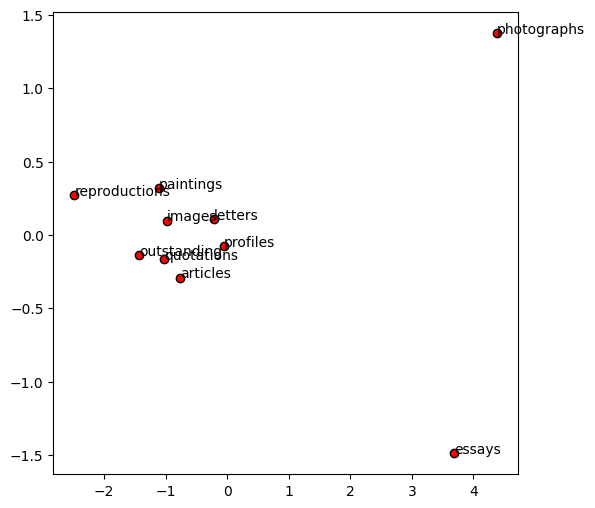

In [28]:
# Display the most similar words
words_similar = [key for key, value in w2v.wv.most_similar("poems")]

display_pca_scatterplot(w2v,
                        words=words_similar)

In [18]:
# List of words and return the one that doesn't match
w2v.wv.doesnt_match(["king", "queen", "poems"])

'poems'